### Importing data

In [126]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (1)')

In [128]:
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,1,1,Соціальний,NaN,571.0,1.56,108.0,13884.0,0,0,0,0,1
1,не успішний,30.00,1,1,Соціальний,8.0,1197.0,2.03,750.0,11700.0,0,0,0,1,1
2,не успішний,15.00,1,1,Соціальний,NaN,402.0,1.81,0.0,6786.0,0,0,0,1,1
3,не успішний,20.00,1,1,Стандартний,NaN,1036.0,2.18,0.0,12948.0,0,0,0,1,1
4,не успішний,30.00,1,1,Соціальний,NaN,513.0,1.63,0.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,3,Преміальний,4.0,6669.0,1.89,963.0,9399.0,0,0,0,0,0
65,успішний,27.26,1,2,Преміальний,3.0,2877.0,1.85,0.0,14079.0,0,1,1,0,0
66,не успішний,148.91,1,1,Стандартний,12.0,2146.0,1.99,315.0,11427.0,0,0,0,0,0
67,не успішний,50.93,1,2,Соціальний,17.0,413.0,1.73,0.0,13338.0,0,1,1,0,0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Успех                               69 non-null     object 
 1   Площадь загальна кв.м               69 non-null     float64
 2   Этаж                                69 non-null     int64  
 3   Количество сотрудников в магазине   69 non-null     int64  
 4   Тип                                 69 non-null     object 
 5   Кількість відгуків в гуглі          39 non-null     float64
 6   Количество чеков                    62 non-null     float64
 7   Среднее количество единиц в чеке    62 non-null     float64
 8   Населення                           64 non-null     float64
 9   Середній дохід наелення,грн         64 non-null     float64
 10  Магазин мобільного звязку           69 non-null     int64  
 11  Продуктовий ринок                   69 non-null

In [130]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

### Missing data

In [131]:
df.dtypes

Успех                                  object
Площадь загальна кв.м                 float64
Количество сотрудников в магазине       int64
Тип                                    object
Кількість відгуків в гуглі            float64
Количество чеков                      float64
Среднее количество единиц в чеке      float64
Населення                             float64
Середній дохід наелення,грн           float64
Магазин мобільного звязку               int64
Продуктовий ринок                       int64
Речовий ринок                           int64
Транзитна зупинка міжміського ГТ        int64
Зупинка ГТ                              int64
dtype: object

In [132]:
df.isnull().sum()

Успех                                  0
Площадь загальна кв.м                  0
Количество сотрудников в магазине      0
Тип                                    0
Кількість відгуків в гуглі            30
Количество чеков                       7
Среднее количество единиц в чеке       7
Населення                              5
Середній дохід наелення,грн            5
Магазин мобільного звязку              0
Продуктовий ринок                      0
Речовий ринок                          0
Транзитна зупинка міжміського ГТ       0
Зупинка ГТ                             0
dtype: int64

In [133]:
#!pip install sklearn

In [134]:
from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(df[['Кількість відгуків в гуглі']]).round()
df[['Количество чеков']] = imputer_mean.fit_transform(df[['Количество чеков']]).round()
df[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(df[['Среднее количество единиц в чеке']]).round()
df[['Населення']] = imputer_mean.fit_transform(df[['Населення']]).round()
df[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(df[['Середній дохід наелення,грн']]).round()

In [135]:
df.isnull().sum()

Успех                                 0
Площадь загальна кв.м                 0
Количество сотрудников в магазине     0
Тип                                   0
Кількість відгуків в гуглі            0
Количество чеков                      0
Среднее количество единиц в чеке      0
Населення                             0
Середній дохід наелення,грн           0
Магазин мобільного звязку             0
Продуктовий ринок                     0
Речовий ринок                         0
Транзитна зупинка міжміського ГТ      0
Зупинка ГТ                            0
dtype: int64

### Outliers

In [136]:
df.describe()

,Площадь загальна кв.м,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.869565,42.898551,3018.101449,1.971014,295.956522,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319
std,37.862989,0.838645,61.280489,1903.190550,0.240772,310.467836,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192
min,4.000000,1.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.000000,12.000000,1651.000000,2.000000,0.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,2.000000,43.000000,2679.000000,2.000000,253.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,2.000000,43.000000,3826.000000,2.000000,545.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,232.300000,4.000000,367.000000,7852.000000,3.000000,963.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [138]:
# Outliers
df = outliers(df)
df

,Успех,Площадь загальна кв.м,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,не успішний,9.00,1,Соціальний,43.0,571.0,2.0,108.0,13884.0,0.0,0,0,0,1
1,не успішний,30.00,1,Соціальний,8.0,1197.0,2.0,750.0,11700.0,0.0,0,0,1,1
2,не успішний,15.00,1,Соціальний,43.0,402.0,2.0,0.0,6786.0,0.0,0,0,1,1
3,не успішний,20.00,1,Стандартний,43.0,1036.0,2.0,0.0,12948.0,0.0,0,0,1,1
4,не успішний,30.00,1,Соціальний,43.0,513.0,2.0,0.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,3,Преміальний,4.0,6669.0,2.0,963.0,9399.0,0.0,0,0,0,0
65,успішний,27.26,2,Преміальний,3.0,2877.0,2.0,0.0,14079.0,0.0,1,1,0,0
66,не успішний,148.91,1,Стандартний,12.0,2146.0,2.0,315.0,11427.0,0.0,0,0,0,0
67,не успішний,50.93,2,Соціальний,17.0,413.0,2.0,0.0,13338.0,0.0,1,1,0,0


### Encoding

In [139]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,5,"[Соціальний, Стандартний, Преміальний, Стандар...",object


In [140]:
# Encoding
type = {'Соціальний':0,'Соціальний Плюс':1,'Стандартний':2,'Стандарт Плюс':3,'Преміальний':4}
df['Тип'] = df['Тип'].map(type)
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
df

,Успех,Площадь загальна кв.м,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0,9.00,1,0,43.0,571.0,2.0,108.0,13884.0,0.0,0,0,0,1
1,0,30.00,1,0,8.0,1197.0,2.0,750.0,11700.0,0.0,0,0,1,1
2,0,15.00,1,0,43.0,402.0,2.0,0.0,6786.0,0.0,0,0,1,1
3,0,20.00,1,2,43.0,1036.0,2.0,0.0,12948.0,0.0,0,0,1,1
4,0,30.00,1,0,43.0,513.0,2.0,0.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,3,4,4.0,6669.0,2.0,963.0,9399.0,0.0,0,0,0,0
65,1,27.26,2,4,3.0,2877.0,2.0,0.0,14079.0,0.0,1,1,0,0
66,0,148.91,1,2,12.0,2146.0,2.0,315.0,11427.0,0.0,0,0,0,0
67,0,50.93,2,0,17.0,413.0,2.0,0.0,13338.0,0.0,1,1,0,0


### Correlation

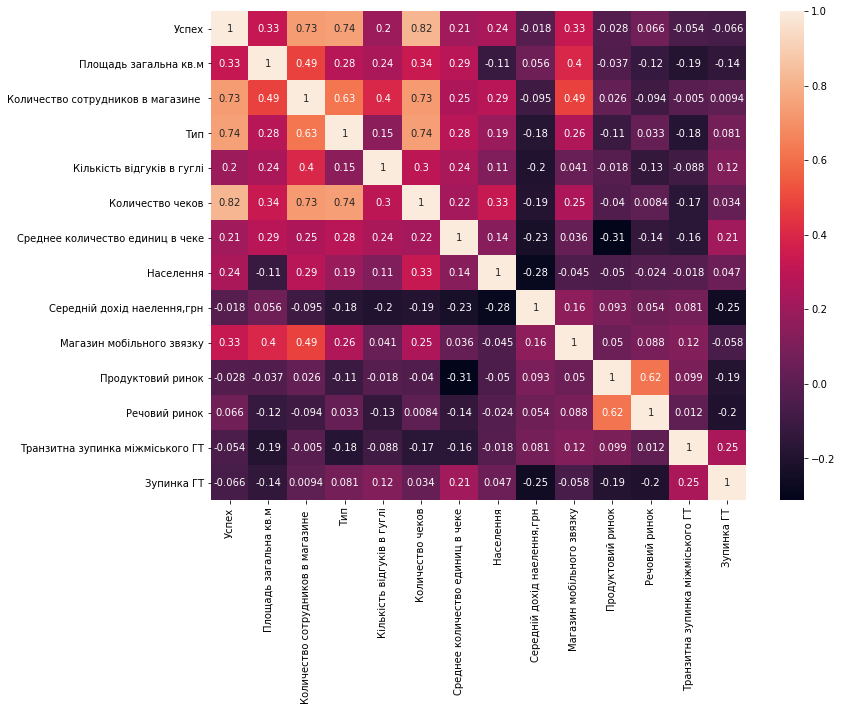

In [141]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [142]:
# Splitting the dataset into the Training set and Test set
# f = ['Площадь загальна кв.м','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Населення','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']

# по причине многочисленных ошибок пришлось порезать столбики до количества 2

f = ['Площадь загальна кв.м','Тип']
X = df[f]
y = df['Успех']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [143]:
df.to_csv('prepeared.csv', sep=',', index=False)

In [144]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection


In [145]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.334249
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.497     
Dependent Variable: Успех            AIC:              40.7673   
Date:               2022-01-03 21:38 BIC:              44.7820   
No. Observations:   55               Log-Likelihood:   -18.384   
Df Model:           1                LL-Null:          -36.572   
Df Residuals:       53               LLR p-value:      1.6262e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1       0.5271      0.4454    1.1833    0.2367    -0.3459    1.4001
x2       2.3939      0.6063    3.9483    0.0001     1.

In [146]:
# Для выборки влиятелен только один фактор - 'Количество сотрудников в штаті'
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[False  True]
[2 1]


In [147]:
# Leaving only Selected Features
X_train_select=X_train[:,[False, True]]
X_test_select=X_test[:,[False, True]]

In [148]:
X_train_select

array([[-0.189876  ],
       [ 1.03873339],
       [-1.41848539],
       [ 1.03873339],
       [-0.80418069],
       [-1.41848539],
       [ 1.03873339],
       [-0.189876  ],
       [-0.189876  ],
       [-0.189876  ],
       [ 1.03873339],
       [ 1.03873339],
       [-0.189876  ],
       [ 1.03873339],
       [ 1.03873339],
       [-1.41848539],
       [-0.189876  ],
       [ 1.03873339],
       [ 1.03873339],
       [ 1.03873339],
       [-0.189876  ],
       [-0.189876  ],
       [-1.41848539],
       [-0.189876  ],
       [-1.41848539],
       [ 1.03873339],
       [-0.189876  ],
       [ 1.03873339],
       [ 1.03873339],
       [-1.41848539],
       [-1.41848539],
       [-1.41848539],
       [ 1.03873339],
       [ 1.03873339],
       [ 1.03873339],
       [-1.41848539],
       [-0.189876  ],
       [ 1.03873339],
       [ 1.03873339],
       [-0.189876  ],
       [ 1.03873339],
       [ 0.4244287 ],
       [-1.41848539],
       [ 1.03873339],
       [-1.41848539],
       [-0

In [149]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

### Classification Tree

In [150]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

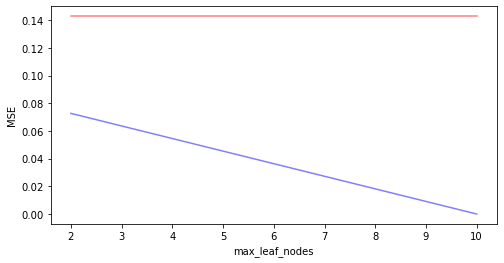

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [152]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 2, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [153]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test).round(3)

0.857

In [154]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 2]
 [0 4]]


### Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


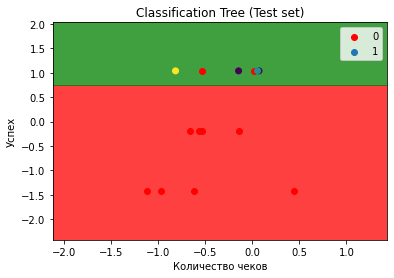

In [155]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Успех')
plt.legend()
plt.show()

### Forest

In [156]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

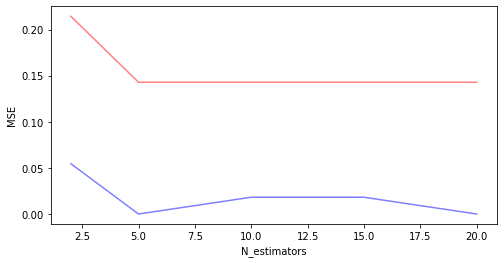

In [157]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [158]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

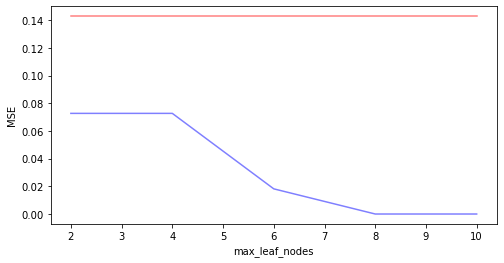

In [159]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 3, 4, 6, 8, 10])

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

In [161]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.857

In [162]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[8 2]
 [0 4]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


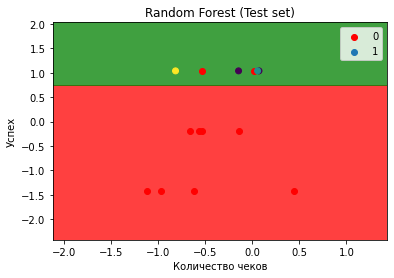

In [163]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Успех')
plt.legend()
plt.show()

In [164]:
ct.score(X_test,y_test).round(3) # tree

0.857

In [165]:
rf.score(X_test,y_test).round(3) # Forest

0.857

In [166]:
print(cm) # tree
print()
print(cm2) # Forest

[[8 2]
 [0 4]]

[[8 2]
 [0 4]]


Точность моделей одинаковая

Решения моделей одинаковы


### Hierarchical clustering

In [167]:
df = pd.read_csv('prepeared.csv', sep=',')
df

,Успех,Площадь загальна кв.м,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0,9.00,1,0,43.0,571.0,2.0,108.0,13884.0,0.0,0,0,0,1
1,0,30.00,1,0,8.0,1197.0,2.0,750.0,11700.0,0.0,0,0,1,1
2,0,15.00,1,0,43.0,402.0,2.0,0.0,6786.0,0.0,0,0,1,1
3,0,20.00,1,2,43.0,1036.0,2.0,0.0,12948.0,0.0,0,0,1,1
4,0,30.00,1,0,43.0,513.0,2.0,0.0,11427.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,3,4,4.0,6669.0,2.0,963.0,9399.0,0.0,0,0,0,0
65,1,27.26,2,4,3.0,2877.0,2.0,0.0,14079.0,0.0,1,1,0,0
66,0,148.91,1,2,12.0,2146.0,2.0,315.0,11427.0,0.0,0,0,0,0
67,0,50.93,2,0,17.0,413.0,2.0,0.0,13338.0,0.0,1,1,0,0


In [168]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в магазине','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Населення','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round()

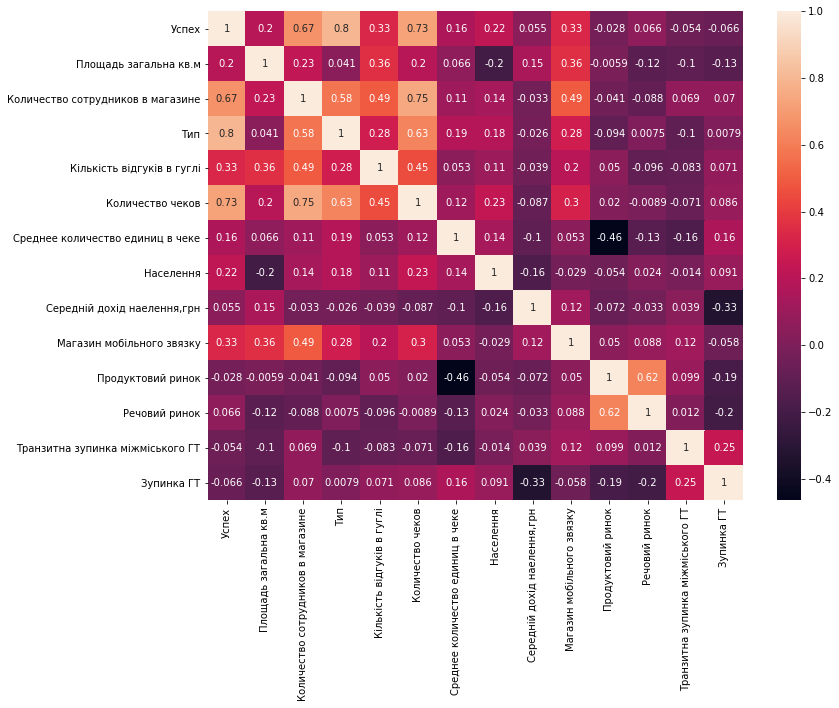

In [169]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

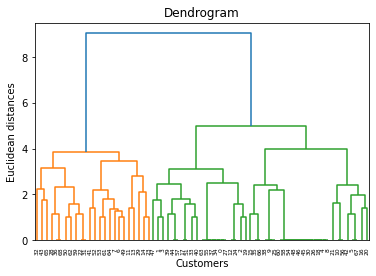

In [170]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model


In [184]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [185]:
hc

array([0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 1], dtype=int64)

### Feature Reduction

In [173]:
# Less features
X = df.iloc[:, [0, 2, 3, 5]]

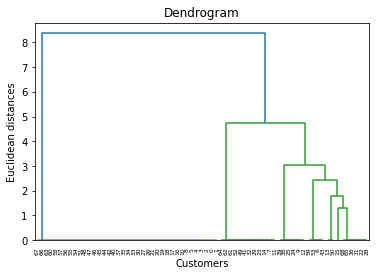

In [174]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [175]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [176]:
hc

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

### K-Means Clustering 

In [177]:
df = pd.read_csv('prepeared.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в магазине','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Населення','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round()


,Успех,Площадь загальна кв.м,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


### Number of clusters

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


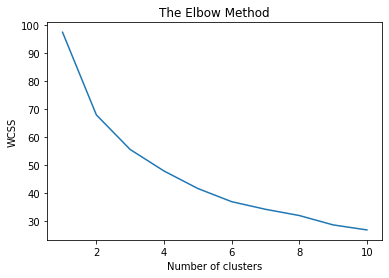

In [178]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

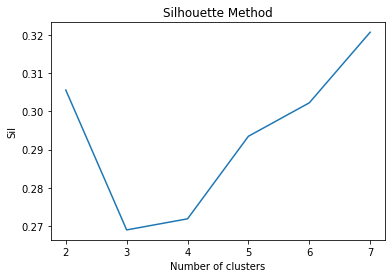

2:0.3055634833696082
3:0.2689525623263951
4:0.27185528676887116
5:0.29346482177869626
6:0.30221415465585433
7:0.32068974358320085


In [182]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [186]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в магазине','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Населення','Середній дохід наелення,грн','Магазин мобільного звязку','Продуктовий ринок','Речовий ринок','Транзитна зупинка міжміського ГТ','Зупинка ГТ']).round(2)

,Успех,Площадь загальна кв.м,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,1.00,0.37,0.57,0.98,0.23,0.64,0.58,0.43,0.65,0.17,0.12,0.12,0.08,0.33
1,0.00,0.16,0.12,0.44,0.14,0.18,0.57,0.28,0.60,-0.00,0.00,0.00,0.18,1.00
2,0.00,0.28,0.14,0.32,0.15,0.22,0.57,0.22,0.71,-0.00,0.00,0.05,0.00,0.00
3,0.11,0.18,0.19,0.31,0.10,0.20,0.38,0.22,0.73,0.00,1.00,0.56,0.22,0.00


### Feature Reduction

In [187]:
# Less features
X = df[:, [0, 2, 3, 5]]

In [189]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в магазине','Тип','Количество чеков']).round()

,Успех,Количество сотрудников в магазине,Тип,Количество чеков
0,-0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0


In [190]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.635

Результаты иерархической кластеризации пересекаются на 63.5 % с результатами кластеризации на основе К-средних